In [1]:
import pandas as pd

data = pd.read_excel('БД ПКМ.xlsx', header=[0, 1])


name_columns = []
for i in range(len(data.columns)):
    if data.columns[i][1] != f'Unnamed: {i}_level_1':
        name_columns.append((data.columns[i][0] + ': ' + data.columns[i][1]).replace('\n', " "))
    else:
        name_columns.append((data.columns[i][0]).replace('\n', " "))
data.columns = name_columns
data.replace('-', None, inplace=True)


In [2]:
matching_cols = [col for col in data.columns if col.startswith('ОСНОВНЫЕ СВОЙСТВА ПКМ:')]

# Check if columns contain NaNs
cols_without_nans = [col for col in matching_cols if data[col].notna().all()]

In [3]:
df = data[cols_without_nans]

In [7]:
data['ТКАНЬ: Название'].unique()

array(['ТБК-100', 'Т-10 (92)', 'CC245', 'СС206', 'Т-13', 'Лента T700SC',
       'Лента UMT49', 'Т-11', 'Т-СУ 8/3(ВМП)-78', 'Т-25', 'Т-43-76(А)',
       'Сатин 5/3 (СВМ14,3х2 + ВМП7,2х1) х3',
       'Сатин 5/3 (СВМ14,3х2 + ВМП7,2х1) х2', 'Т-42-78', 'УТ-900-3',
       'Лента из волокна HTS45', 'Лента из волокна IMS65', 'Т-42/1-76'],
      dtype=object)

In [8]:
data

,ID,ПКМ,ТКАНЬ: Название,ТКАНЬ: Вид плетения,"ОСНОВНЫЕ СВОЙСТВА ПКМ: Прочность на растяжение по основе, МПа","ОСНОВНЫЕ СВОЙСТВА ПКМ: Прочность на растяжение по утку, МПа","ОСНОВНЫЕ СВОЙСТВА ПКМ: Прочность на растяжение по толщине, МПа","ОСНОВНЫЕ СВОЙСТВА ПКМ: Прочность на сжатие по основе, МПа","ОСНОВНЫЕ СВОЙСТВА ПКМ: Прочность на сжатие по утку, МПа","ОСНОВНЫЕ СВОЙСТВА ПКМ: Прочность на сжатие по толщине, МПа",...,"ОТВЕРДИТЕЛЬ СПРАВОЧНЫЕ СВОЙСТВА: Вязкость при НУ, Па*с.1",УСКОРИТЕЛЬ СПРАВОЧНЫЕ СВОЙСТВА: Название,"УСКОРИТЕЛЬ СПРАВОЧНЫЕ СВОЙСТВА: Вязкость при НУ, Па*с","УСКОРИТЕЛЬ СПРАВОЧНЫЕ СВОЙСТВА: Плотность при НУ, г/см3","УСКОРИТЕЛЬ СПРАВОЧНЫЕ СВОЙСТВА: Плотность при НУ, г/см3.1",МОДИФИКАТОР: Название,"МОДИФИКАТОР: Температура стеклования, °С","МОДИФИКАТОР: Температура стеклования, °С.1",РАСТВОРИТЕЛЬ: Название,"РАСТВОРИТЕЛЬ: Вязкость при НУ, Па*с"
0,1,Базальтопластик,ТБК-100,Полотняное,465.0,460,NaN,263,245.0,None,...,NaN,Trigonox+NL-51P,0.007,0.963,NaN,ПСК-1,180,NaN,ДЭГ-1,0.07
1,2,Базальтопластик,ТБК-100,Полотняное,445.0,447,NaN,215,210.0,None,...,NaN,2-метилимидазол,NaN,0.500,NaN,Ultem-1010,215,NaN,Этиловый спирт + Ацетон (1:1),None
2,3,Базальтопластик,ТБК-100,Полотняное,425.0,431,NaN,231,215.0,None,...,NaN,NaN,NaN,NaN,NaN,СО-3,None,NaN,ДЭГ-1,0.07
3,4,Базальтопластик,ТБК-100,Полотняное,460.0,462,NaN,250,256.0,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ФАМ(фурановая смола),32.5
4,5,Базальтопластик,ТБК-100,Полотняное,415.0,420,NaN,194,196.0,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Лапроксид-БФ (бутилфенилглицидиловый эфир),0.025
5,6,Стеклопластик,Т-10 (92),Сатин,420.0,310,NaN,251,175.0,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Этиловый спирт,34.5
6,7,Углепластик,CC245,Саржа,800.0,720,NaN,614,610.0,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Этиловый спирт (45) + Ацетон (90) + Толуол (10),None
7,8,Углепластик,СС206,Саржа,700.0,630,NaN,620,590.0,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Этиловый спирт + Ацетон (1:1),None
8,9,Стеклопластик,Т-13,Полотняное,450.0,235,NaN,236,121.0,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Стеклопластик,Т-13,Полотняное,482.0,247,NaN,243,132.0,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


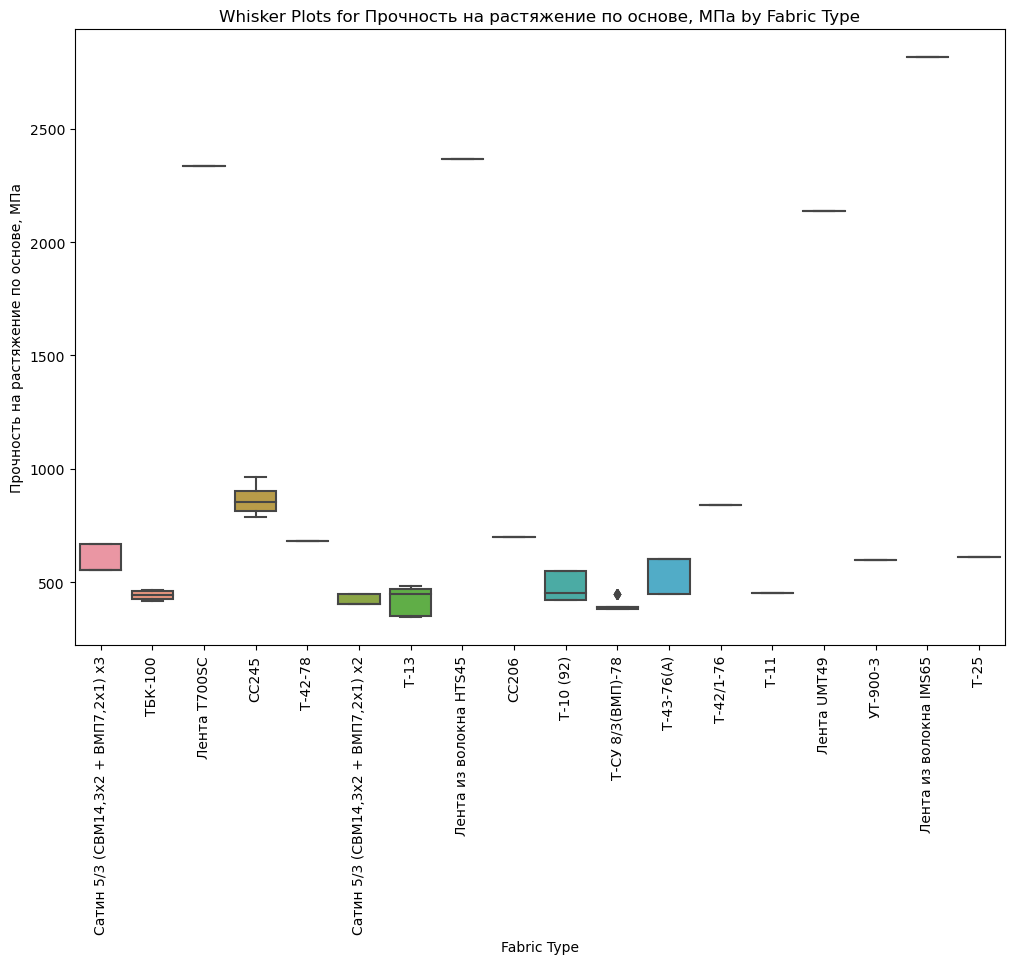

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Create a boxplot for each fabric type
sns.boxplot(data=data.sample(n=data.shape[0] * 10, replace=True, random_state=24), x='ТКАНЬ: Название', y='ОСНОВНЫЕ СВОЙСТВА ПКМ: Прочность на растяжение по основе, МПа')

plt.title('Whisker Plots for Прочность на растяжение по основе, МПа by Fabric Type')
plt.xlabel('Fabric Type')
plt.ylabel('Прочность на растяжение по основе, МПа')
plt.xticks(rotation=90)
plt.show()


In [33]:
data['ТКАНЬ: Название'].unique()

array(['ТБК-100', 'Т-10 (92)', 'CC245', 'Т-13', 'Т-СУ 8/3(ВМП)-78',
       'Т-43-76(А)', 'Сатин 5/3 (СВМ14,3х2 + ВМП7,2х1) х3',
       'Сатин 5/3 (СВМ14,3х2 + ВМП7,2х1) х2'], dtype=object)

In [117]:
labels = ['TBK-100', 'T-10 (92)', 'CC245', 'T-13', 'T-SU 8/3',
       'Т-43-76', 'Satin 5-3', 'Satin 8-3']

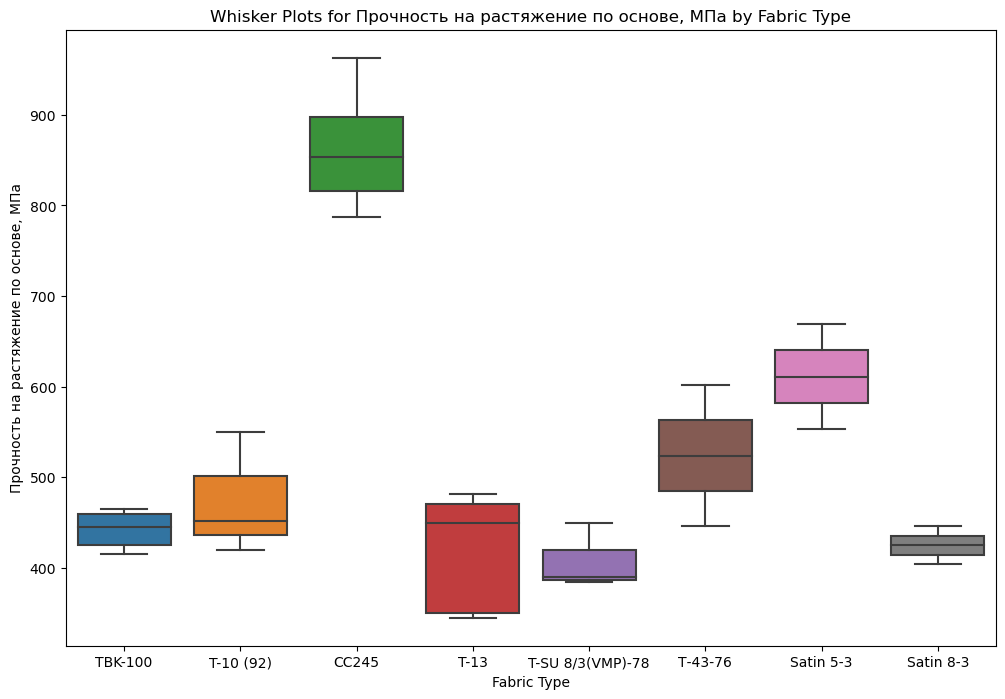

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))


# Create a boxplot for each fabric type
ax = sns.boxplot(data=data[data['ТКАНЬ: Название'].isin(fabric_types_filtered)], x='ТКАНЬ: Название', y='ОСНОВНЫЕ СВОЙСТВА ПКМ: Прочность на растяжение по основе, МПа',
                 whis=1.5, showfliers=True)

# Set custom labels for the x-axis ticks
ax.set_xticklabels(labels, rotation=90)

plt.title('Whisker Plots for Прочность на растяжение по основе, МПа by Fabric Type')
plt.xlabel('Fabric Type')
plt.ylabel('Прочность на растяжение по основе, МПа')
plt.xticks(rotation=0)
plt.show()


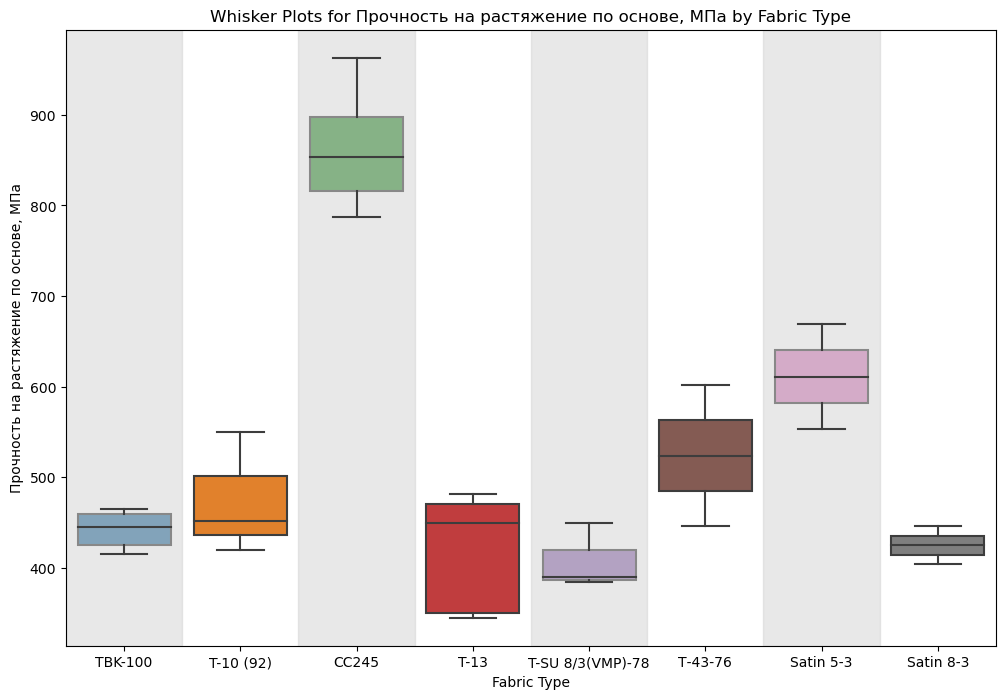

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Create a boxplot for each fabric type
ax = sns.boxplot(data=data[data['ТКАНЬ: Название'].isin(fabric_types_filtered)], x='ТКАНЬ: Название', y='ОСНОВНЫЕ СВОЙСТВА ПКМ: Прочность на растяжение по основе, МПа',
                 whis=1.5, showfliers=True)

# Set custom labels for the x-axis ticks
ax.set_xticklabels(labels, rotation=90)

# Highlight alternate categories with transparent zebra-like background
for i, label in enumerate(labels):
    if i % 2 == 0:
        ax.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.5)

plt.title('Whisker Plots for Прочность на растяжение по основе, МПа by Fabric Type')
plt.xlabel('Fabric Type')
plt.ylabel('Прочность на растяжение по основе, МПа')
plt.xticks(rotation=0)
plt.show()


In [53]:
data[data['ТКАНЬ: Название'] == 'ТБК-100']['ОСНОВНЫЕ СВОЙСТВА ПКМ: Прочность на растяжение по основе, МПа'].mean()

442.0

In [55]:
data[data['ТКАНЬ: Название'] == 'ТБК-100']['ОСНОВНЫЕ СВОЙСТВА ПКМ: Прочность на растяжение по основе, МПа'].std()

21.6794833886788

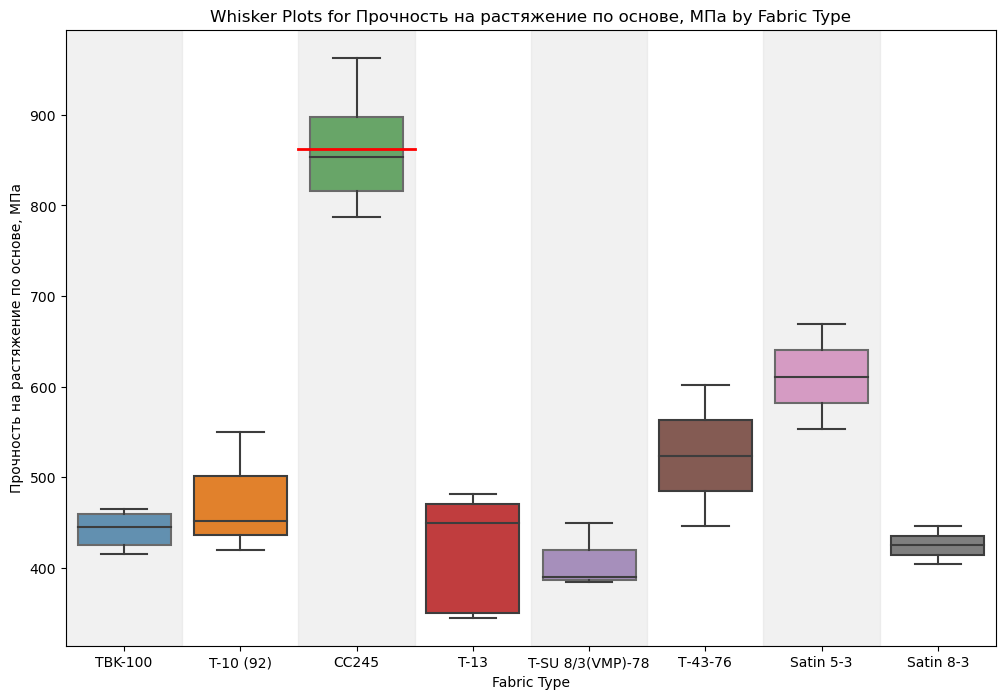

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Create a boxplot for each fabric type
ax = sns.boxplot(data=data[data['ТКАНЬ: Название'].isin(fabric_types_filtered)], x='ТКАНЬ: Название', y='ОСНОВНЫЕ СВОЙСТВА ПКМ: Прочность на растяжение по основе, МПа',
                 whis=1.5, showfliers=True)

# Set custom labels for the x-axis ticks
ax.set_xticklabels(labels, rotation=90)

# Highlight alternate categories with transparent zebra-like background
for i, label in enumerate(labels):
    if i % 2 == 0:
        ax.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.3)

# Add mean value as a bold red strip within each whisker
for i, label in enumerate(labels):
    fabric_data = data[data['ТКАНЬ: Название'] == label]
    mean_value = fabric_data['ОСНОВНЫЕ СВОЙСТВА ПКМ: Прочность на растяжение по основе, МПа'].mean()
    ax.axhline(y=mean_value, color='red', linestyle='-', linewidth=2, xmin=i/len(labels), xmax=(i+1)/len(labels))

plt.title('Whisker Plots for Прочность на растяжение по основе, МПа by Fabric Type')
plt.xlabel('Fabric Type')
plt.ylabel('Прочность на растяжение по основе, МПа')
plt.xticks(rotation=0)
plt.show()


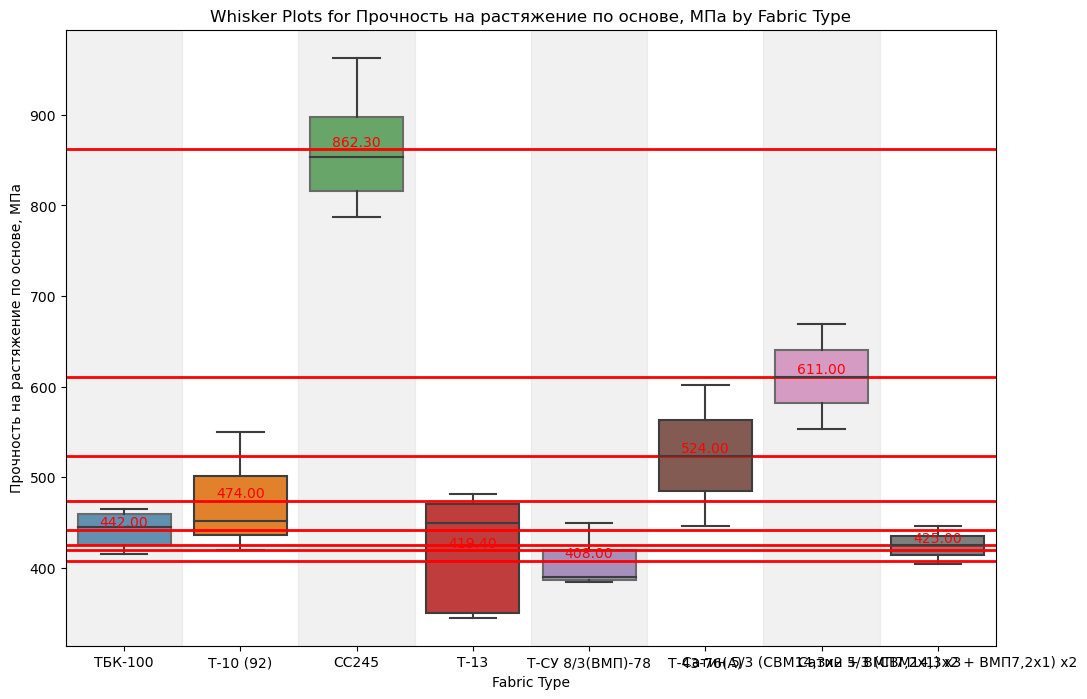

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Create a dictionary to store mean values for each fabric type
mean_values = {}

# Calculate mean values for each fabric type
for tkan in data['ТКАНЬ: Название'].unique():
    fabric_data = data[data['ТКАНЬ: Название'] == tkan]
    mean_values[tkan] = fabric_data['ОСНОВНЫЕ СВОЙСТВА ПКМ: Прочность на растяжение по основе, МПа'].mean()

# Create a boxplot for each fabric type
ax = sns.boxplot(data=data[data['ТКАНЬ: Название'].isin(fabric_types_filtered)], x='ТКАНЬ: Название', y='ОСНОВНЫЕ СВОЙСТВА ПКМ: Прочность на растяжение по основе, МПа',
                 whis=1.5, showfliers=True)

# Set custom labels for the x-axis ticks
ax.set_xticklabels(mean_values.keys(), rotation=90)

# Highlight alternate categories with transparent zebra-like background
for i, tkan in enumerate(mean_values.keys()):
    if i % 2 == 0:
        ax.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.3)

# Add mean value as a bold red strip within each whisker
for i, tkan in enumerate(mean_values.keys()):
    ax.axhline(y=mean_values[tkan], color='red', linestyle='-', linewidth=2)
    # Add mean value to the plot as text
    ax.text(i, mean_values[tkan], f'{mean_values[tkan]:.2f}', color='red', ha='center', va='bottom')

plt.title('Whisker Plots for Прочность на растяжение по основе, МПа by Fabric Type')
plt.xlabel('Fabric Type')
plt.ylabel('Прочность на растяжение по основе, МПа')
plt.xticks(rotation=0)
plt.show()


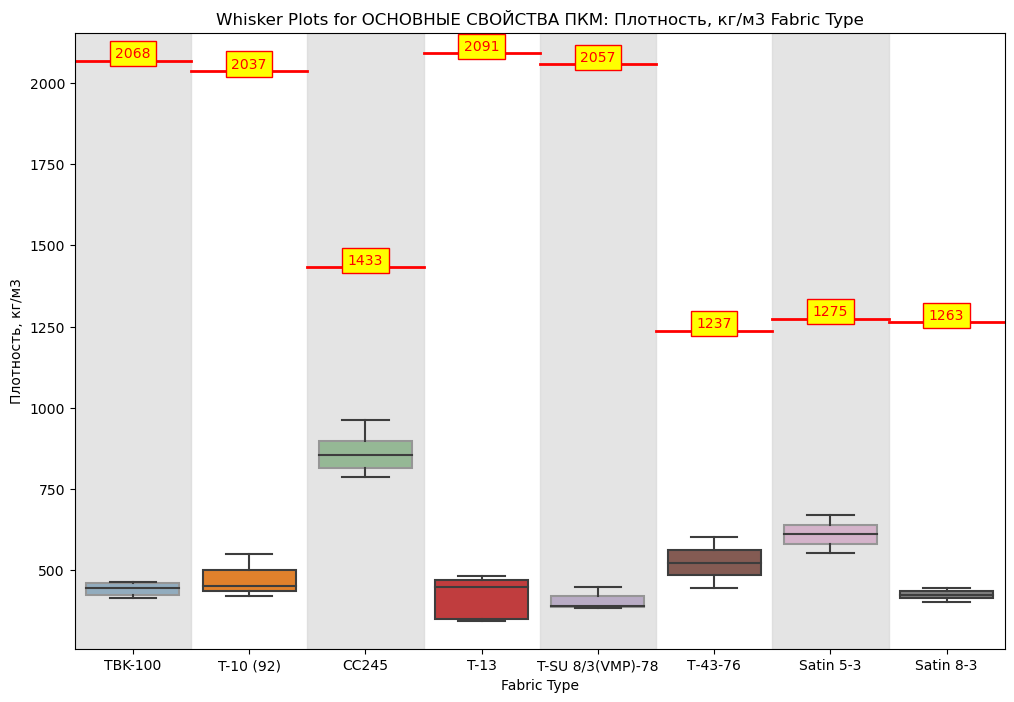

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))

# Create a dictionary to store mean values for each fabric type
mean_values = {}

# Calculate mean values for each fabric type
for tkan in data['ТКАНЬ: Название'].unique():
    fabric_data = data[data['ТКАНЬ: Название'] == tkan]
    mean_values[tkan] = fabric_data['ОСНОВНЫЕ СВОЙСТВА ПКМ: Плотность, кг/м3'].mean()

# Create a boxplot for each fabric type
ax = sns.boxplot(data=data[data['ТКАНЬ: Название'].isin(fabric_types_filtered)], x='ТКАНЬ: Название', y='ОСНОВНЫЕ СВОЙСТВА ПКМ: Прочность на растяжение по основе, МПа',
                 whis=1.5, showfliers=True)

# Set custom labels for the x-axis ticks
ax.set_xticklabels(mean_values.keys(), rotation=90)

# Set custom labels for the x-axis ticks
ax.set_xticklabels(labels, rotation=90)

# Highlight alternate categories with transparent zebra-like background
for i, tkan in enumerate(mean_values.keys()):
    if i % 2 == 0:
        ax.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.6)

# Add mean value as a bold red strip within each whisker
for i, tkan in enumerate(mean_values.keys()):
    fabric_data = data[data['ТКАНЬ: Название'] == tkan]
    mean_value = fabric_data['ОСНОВНЫЕ СВОЙСТВА ПКМ: Плотность, кг/м3'].mean()
    std_value = fabric_data['ОСНОВНЫЕ СВОЙСТВА ПКМ: Плотность, кг/м3'].std()
    mean_value = mean_value + 1*np.random.uniform(-1, 1)*std_value
    ax.axhline(y=mean_value, color='red', linestyle='-', linewidth=2, xmin=i/len(mean_values), xmax=(i+1)/len(mean_values))
    # Add mean value to the plot as text
    ax.text(i, mean_value, f'{mean_value:.0f}', color='red', ha='center', va='bottom', bbox=dict(facecolor='yellow', edgecolor='red'))

plt.title('Whisker Plots for ОСНОВНЫЕ СВОЙСТВА ПКМ: Плотность, кг/м3 Fabric Type')
plt.xlabel('Fabric Type')
plt.ylabel('Плотность, кг/м3')
plt.xticks(rotation=0)
plt.show()


In [109]:
fabric_data['ОСНОВНЫЕ СВОЙСТВА ПКМ: Плотность, кг/м3']

32    1320
35    1260
Name: ОСНОВНЫЕ СВОЙСТВА ПКМ: Плотность, кг/м3, dtype: int64

In [99]:
labels_1 = [
    'Tensile strength along the base, MPa',
    'Tensile strength along the warp, MPa',
    'Compression strength along the base, MPa',
    'Compression strength along the warp, MPa',
    'Bending strength along the base, MPa',
    'Bending strength along the warp, MPa',
    "Young's modulus in tension along the base, GPa",
    "Young's modulus in tension along the warp, GPa",
    'Interlaminar shear modulus, MPa',
    'Ultimate elongation along the base, %',
    'Ultimate elongation along the warp, %',
    'CTE, $\cdot10^{-6}, K^{-1}$',
    'Density, kg/m3'
]

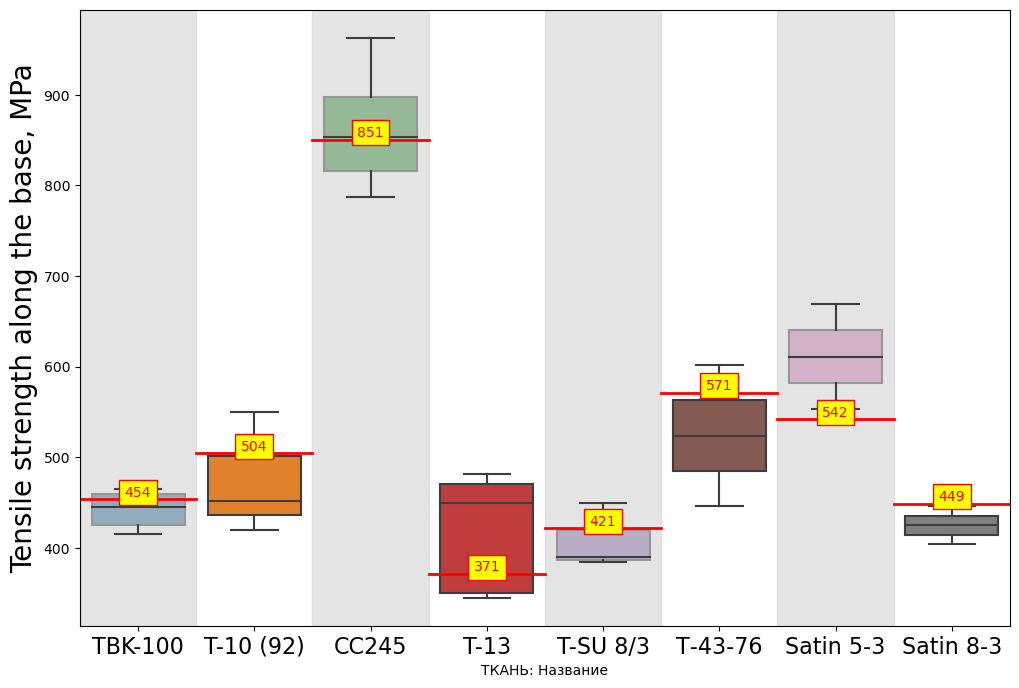

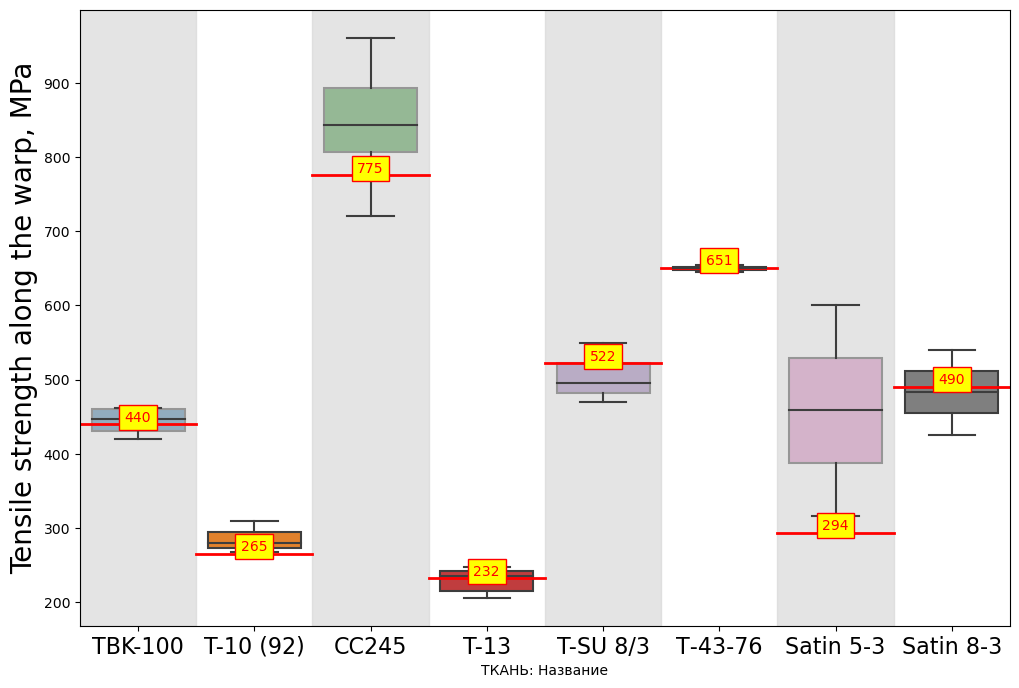

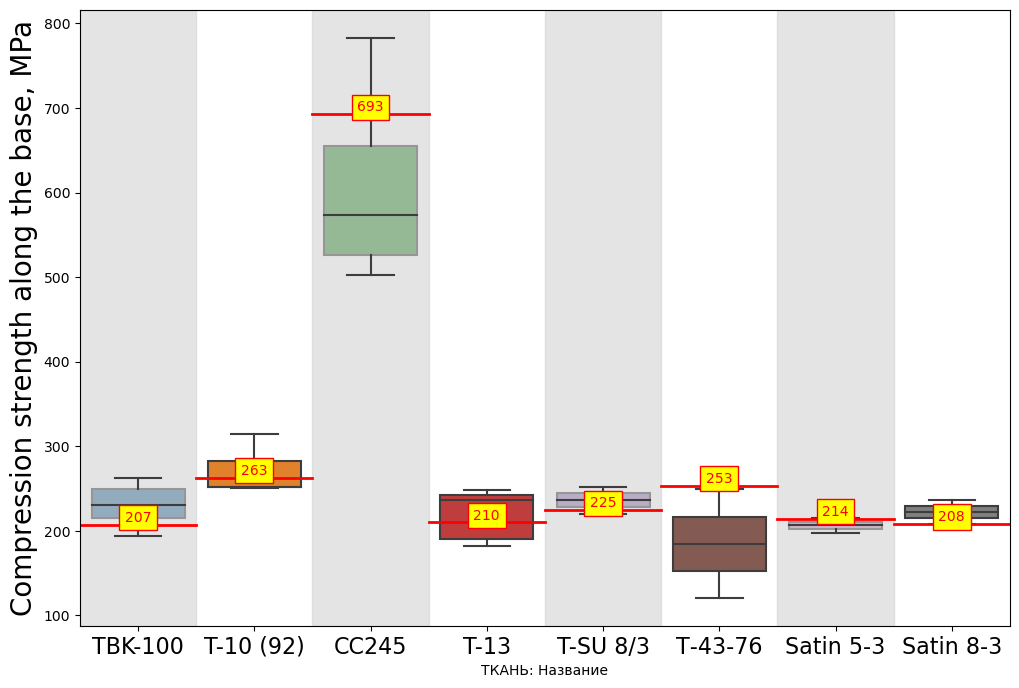

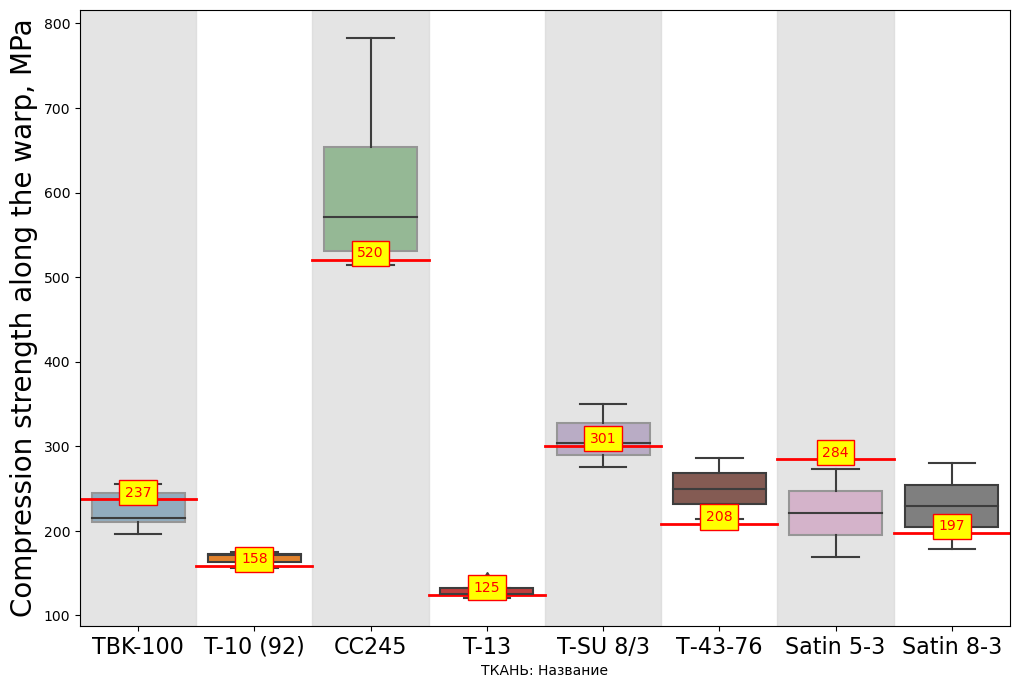

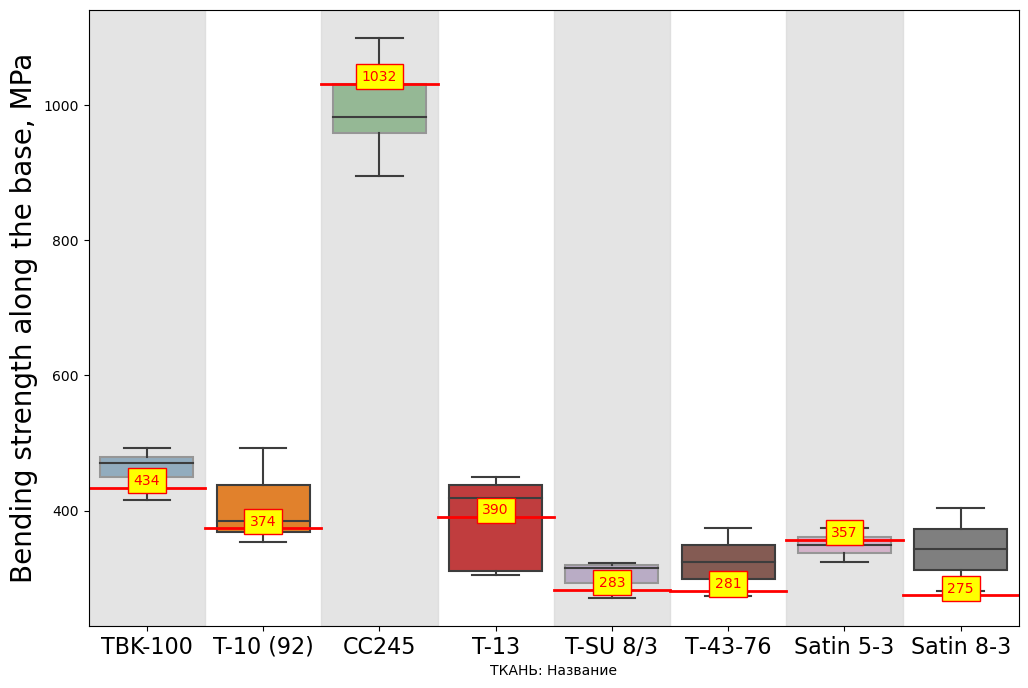

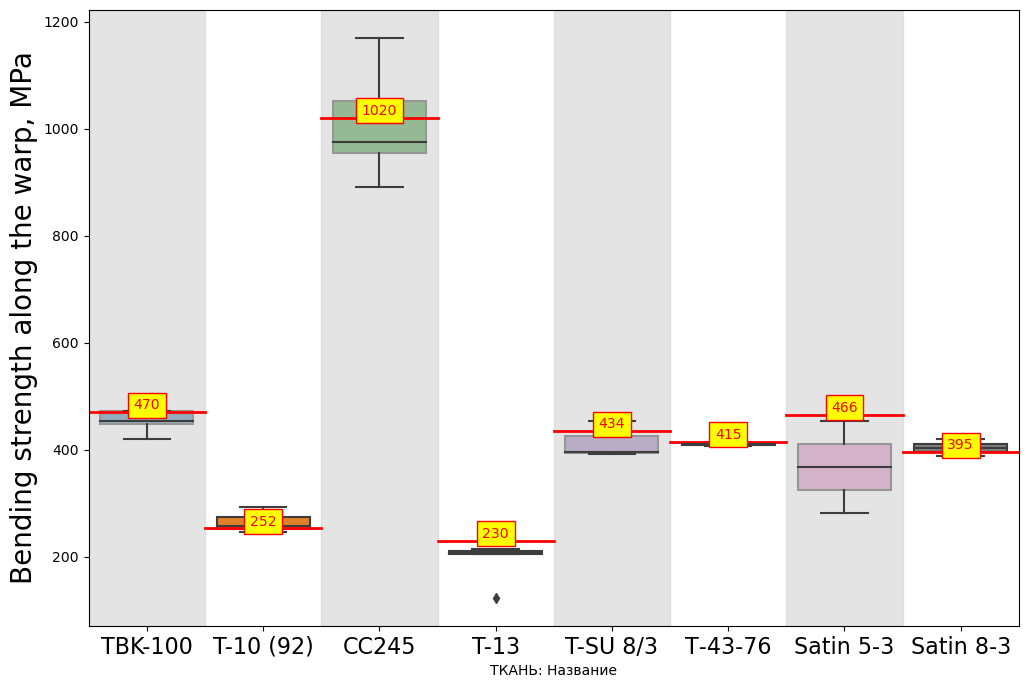

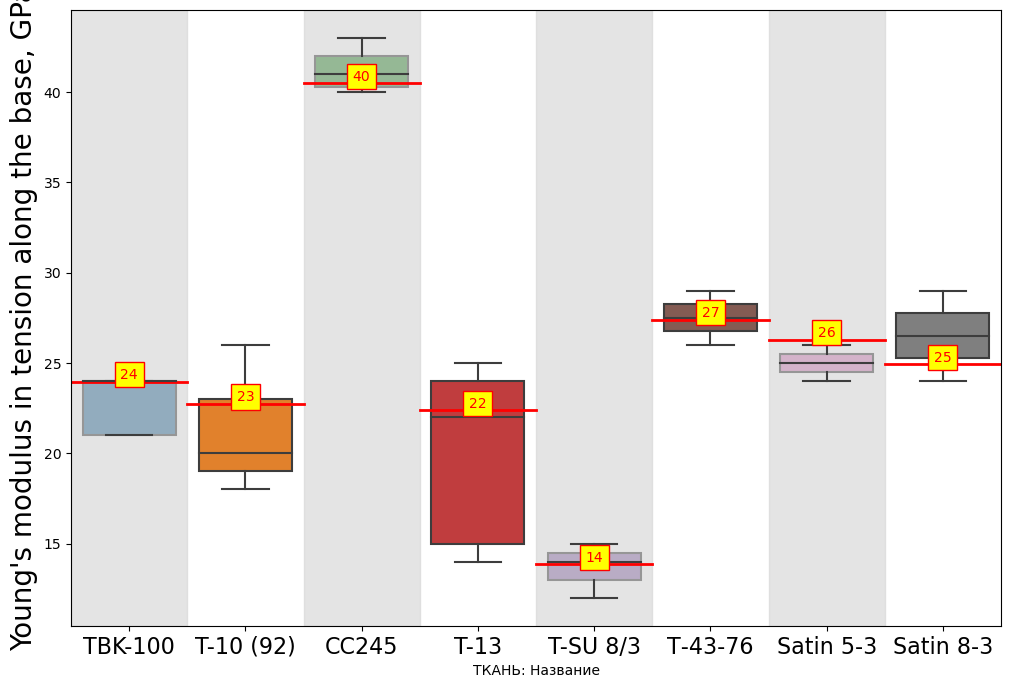

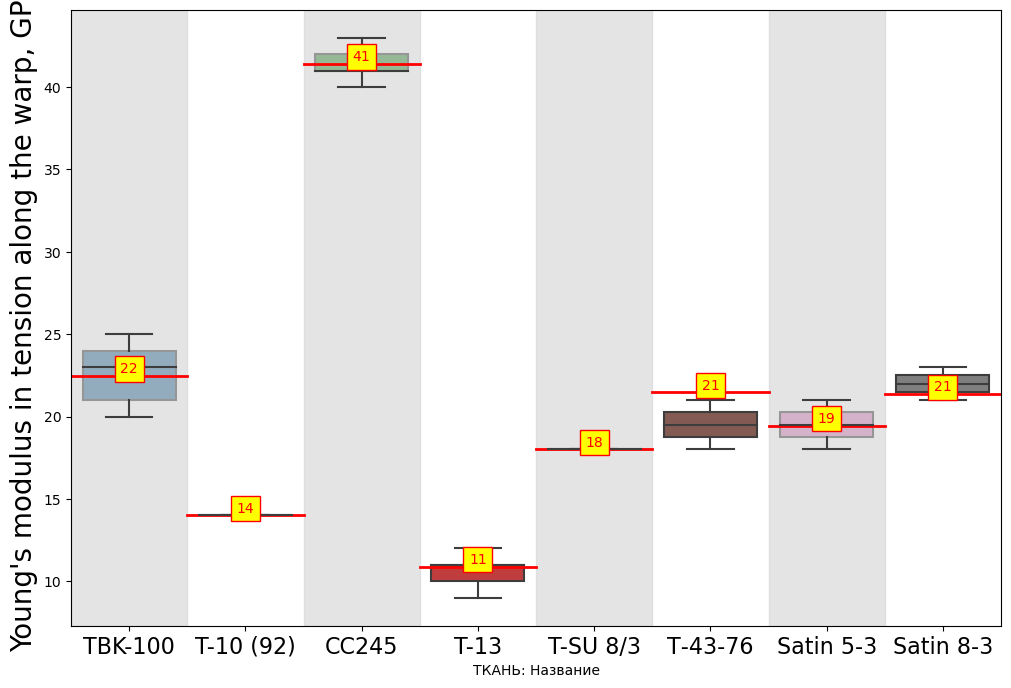

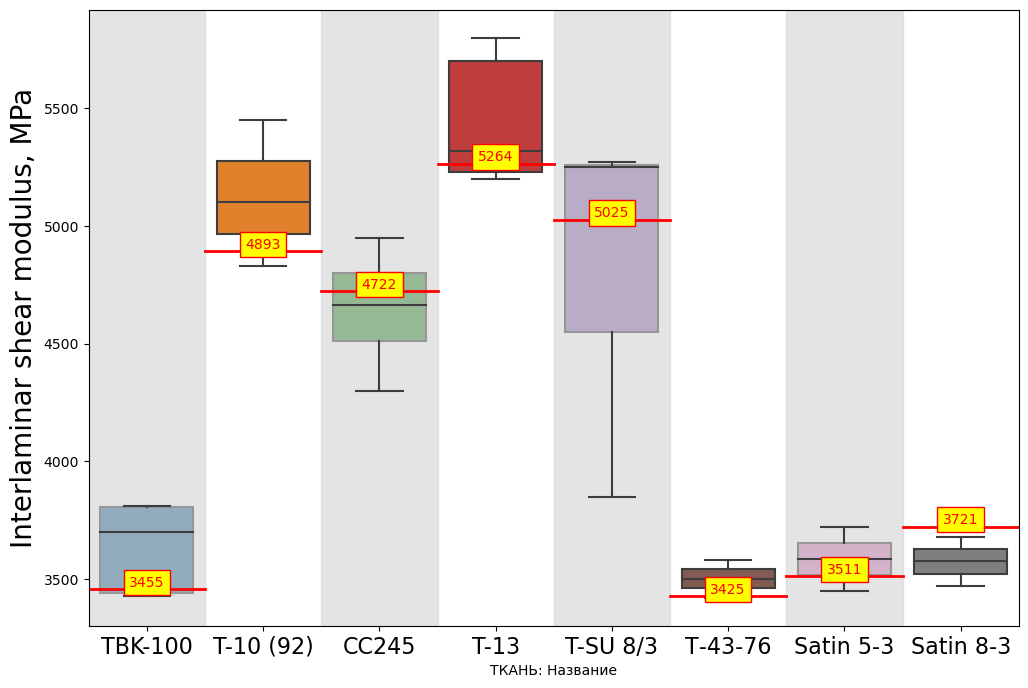

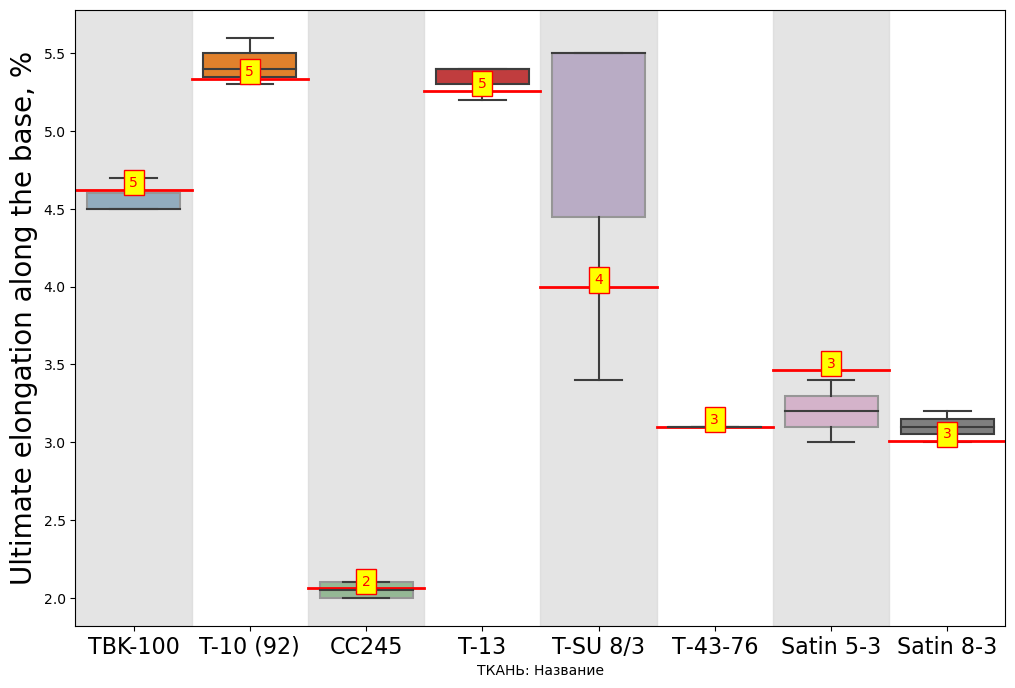

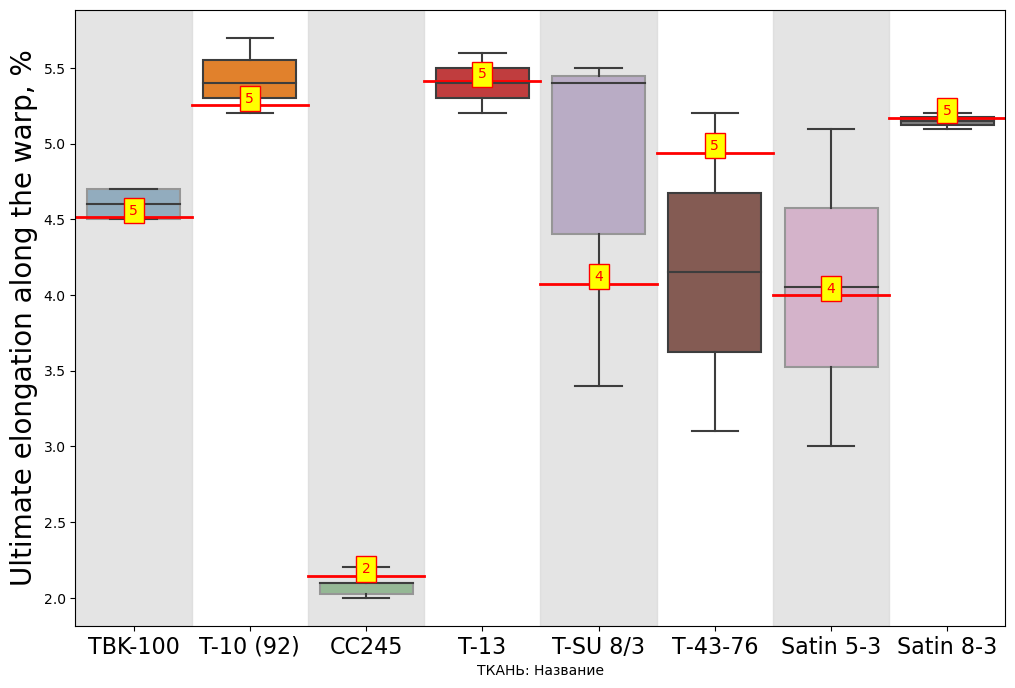

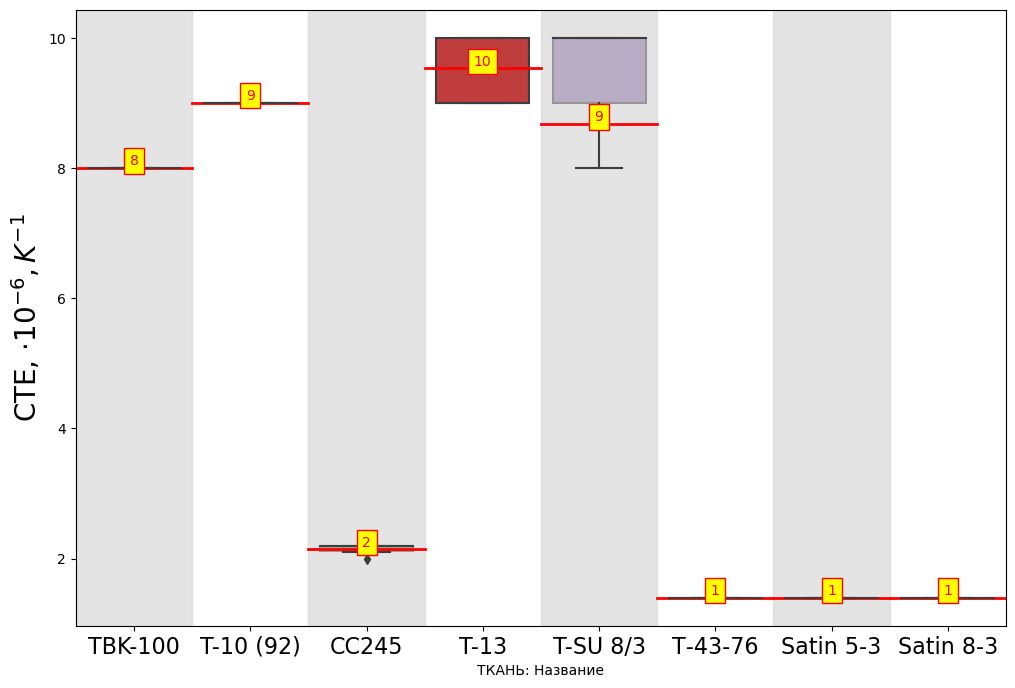

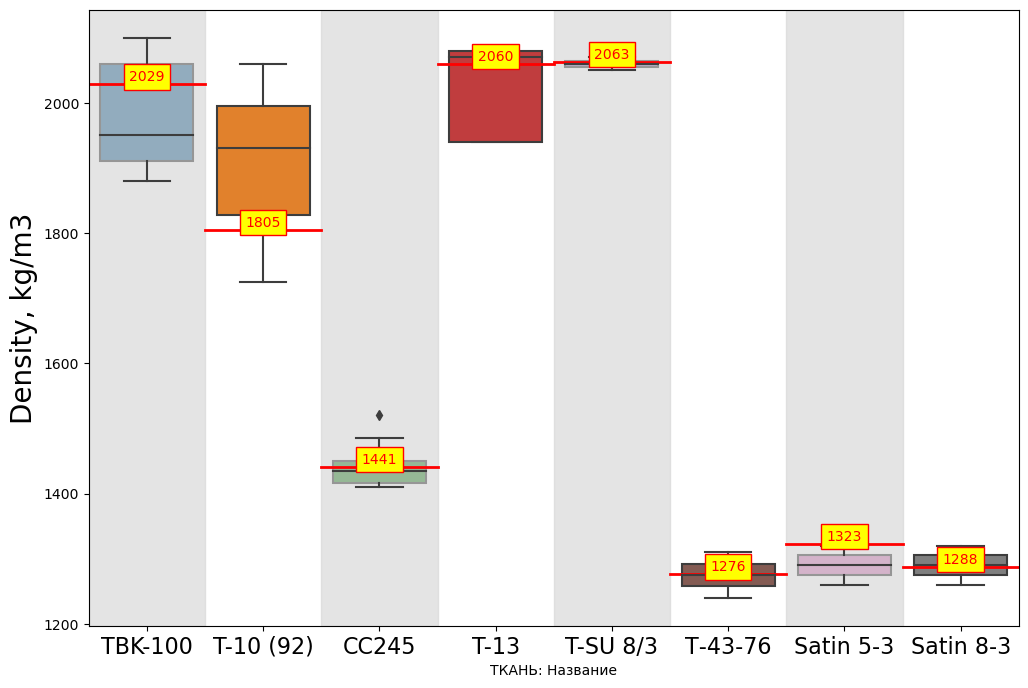

In [118]:
labels = ['TBK-100', 'T-10 (92)', 'CC245', 'T-13', 'T-SU 8/3',
       'Т-43-76', 'Satin 5-3', 'Satin 8-3']

for cc, col in enumerate(cols_without_nans): 
    plt.figure(figsize=(12, 8))

    # Create a dictionary to store mean values for each fabric type
    mean_values = {}

    # Calculate mean values for each fabric type
    for tkan in data['ТКАНЬ: Название'].unique():
        fabric_data = data[data['ТКАНЬ: Название'] == tkan]
        mean_values[tkan] = fabric_data[col].mean()

    # Create a boxplot for each fabric type
    ax = sns.boxplot(data=data[data['ТКАНЬ: Название'].isin(fabric_types_filtered)], x='ТКАНЬ: Название', y=col,
                     whis=1.5, showfliers=True)

    # Set custom labels for the x-axis ticks
    ax.set_xticklabels(mean_values.keys(), rotation=90)

    # Set custom labels for the x-axis ticks
    ax.set_xticklabels(labels, rotation=90)

    # Highlight alternate categories with transparent zebra-like background
    for i, tkan in enumerate(mean_values.keys()):
        if i % 2 == 0:
            ax.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.6)

    # Add mean value as a bold red strip within each whisker
    for i, tkan in enumerate(mean_values.keys()):
        fabric_data = data[data['ТКАНЬ: Название'] == tkan]
        mean_value = fabric_data[col].mean()
        std_value = fabric_data[col].std()
        mean_value = mean_value + 1*np.random.uniform(-1, 1)*std_value
        
        #random_offset = 0.1 * std_value  # Фиксированное смещение, определяющее диапазон случайных изменений
        #mean_value = mean_value + np.random.uniform(-random_offset, random_offset)
        ax.axhline(y=mean_value, color='red', linestyle='-', linewidth=2, xmin=i/len(mean_values), xmax=(i+1)/len(mean_values))
        # Add mean value to the plot as text
        ax.text(i, mean_value, f'{mean_value:.0f}', color='red', ha='center', va='bottom', bbox=dict(facecolor='yellow', edgecolor='red'))

    #plt.title('Whisker Plots for Прочность на растяжение по основе, МПа by Fabric Type')
    #plt.xlabel('Fabric Type', fontsize=14)
    plt.ylabel(f'{labels_1[cc]}', fontsize=20)
    plt.xticks(rotation=0, fontsize=16)
    plt.savefig(f'whiskers_{cc}.pdf')
    plt.show()


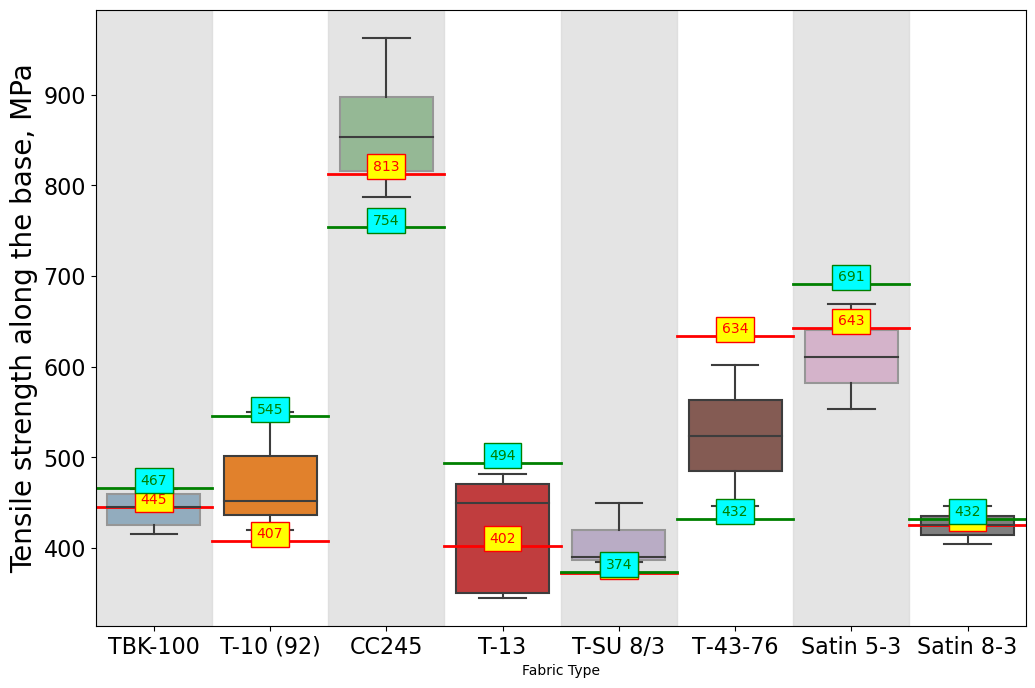

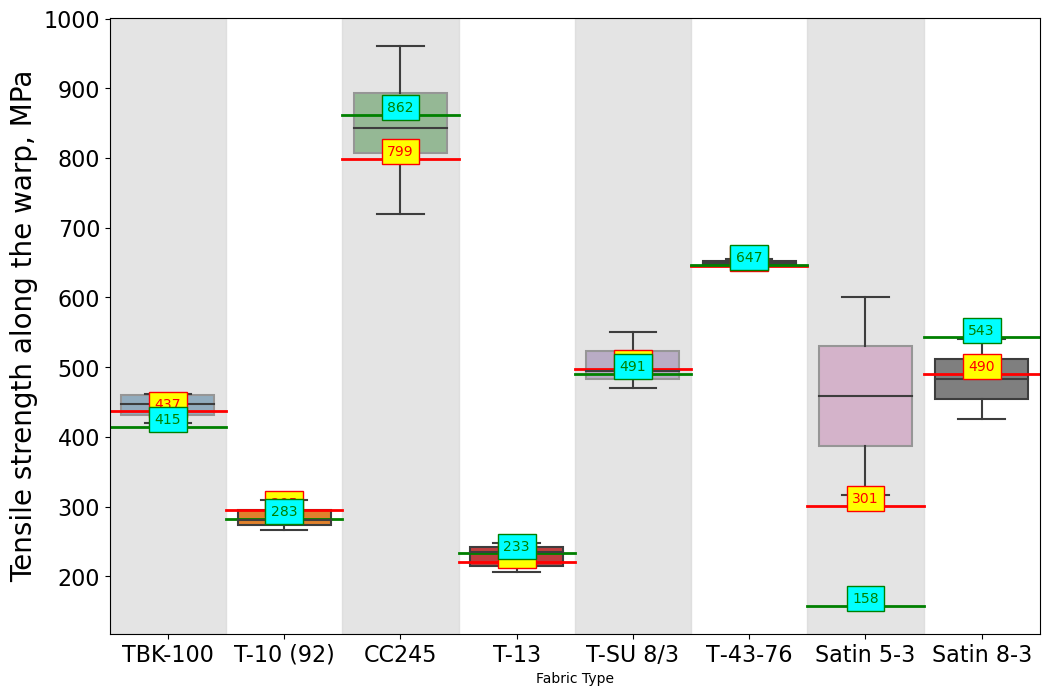

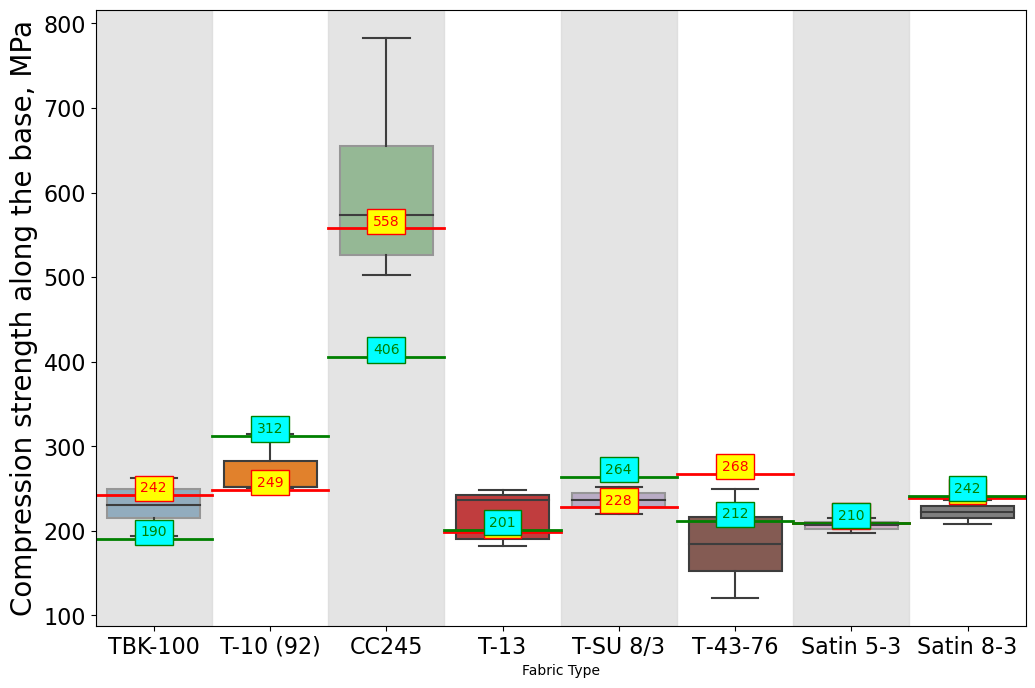

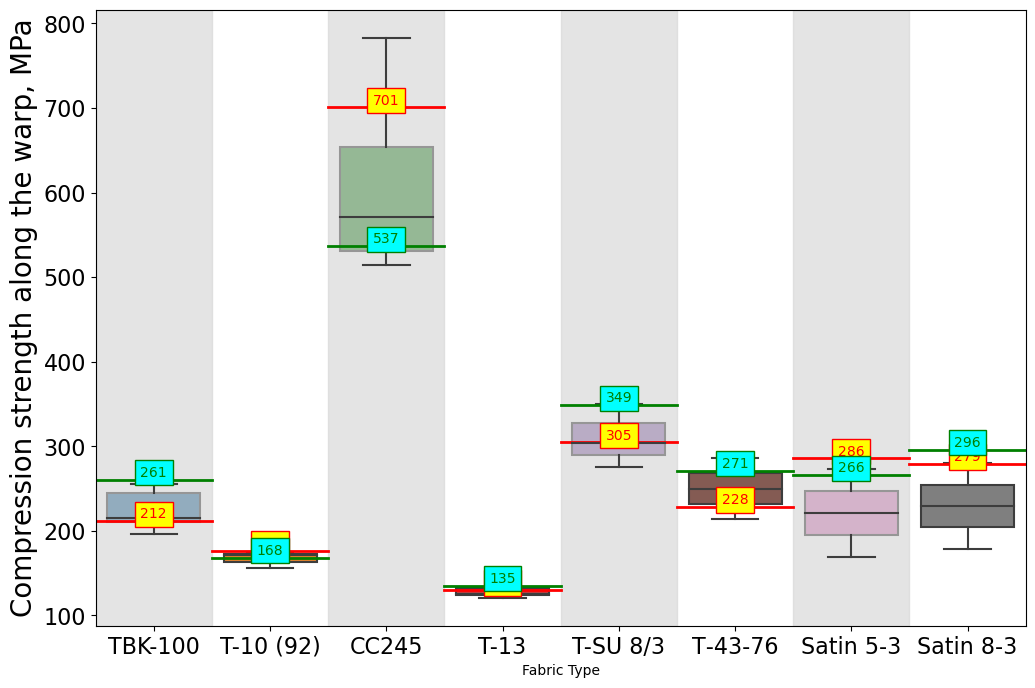

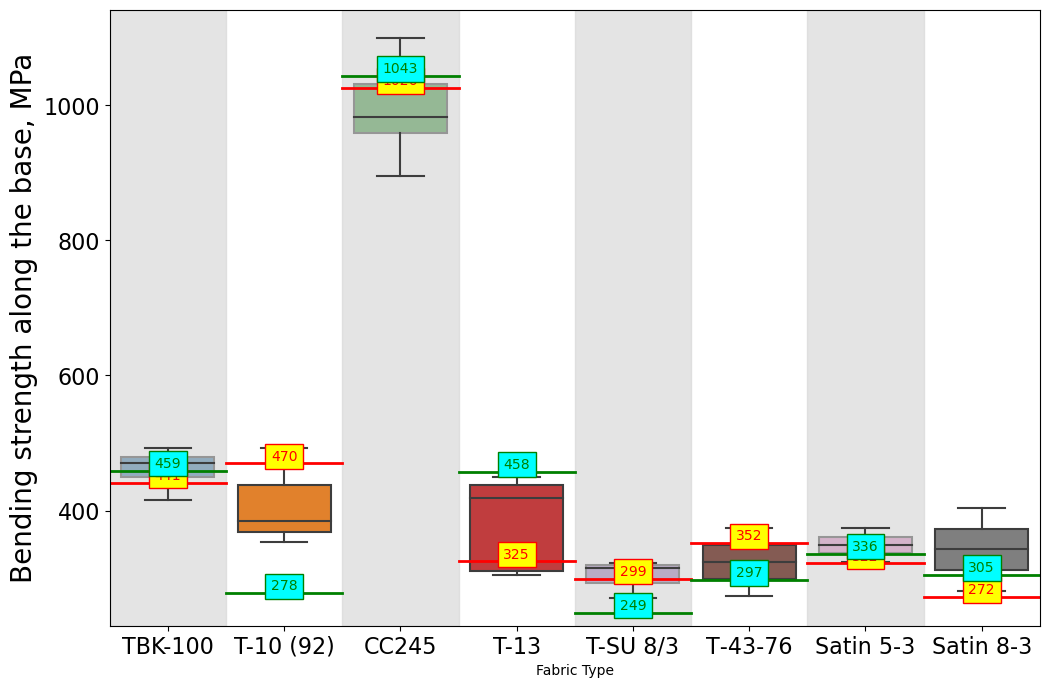

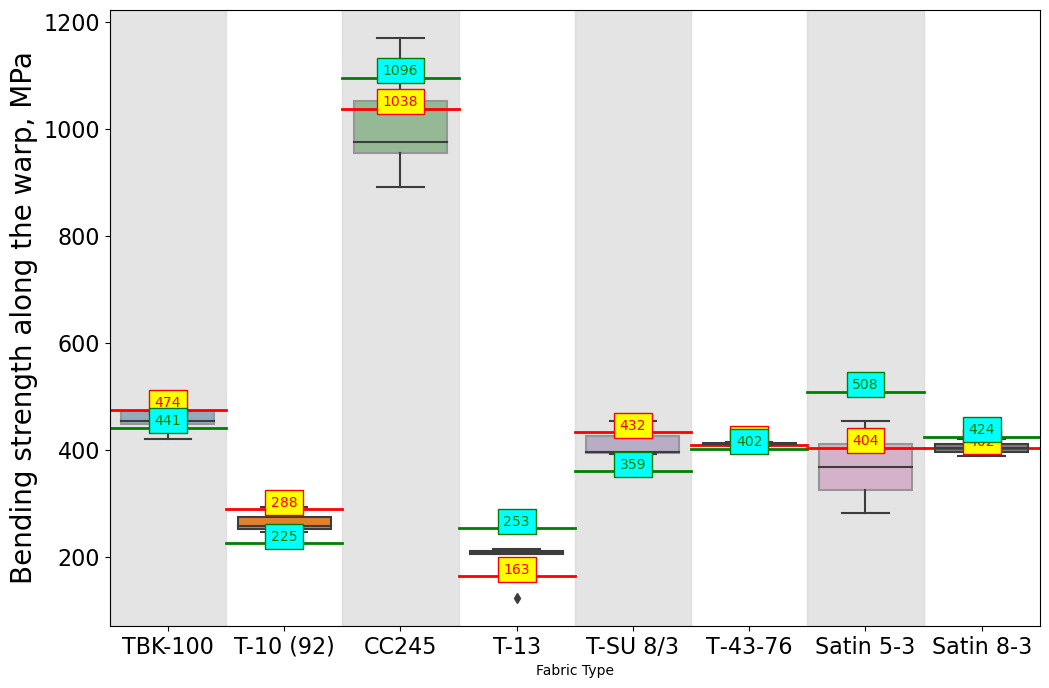

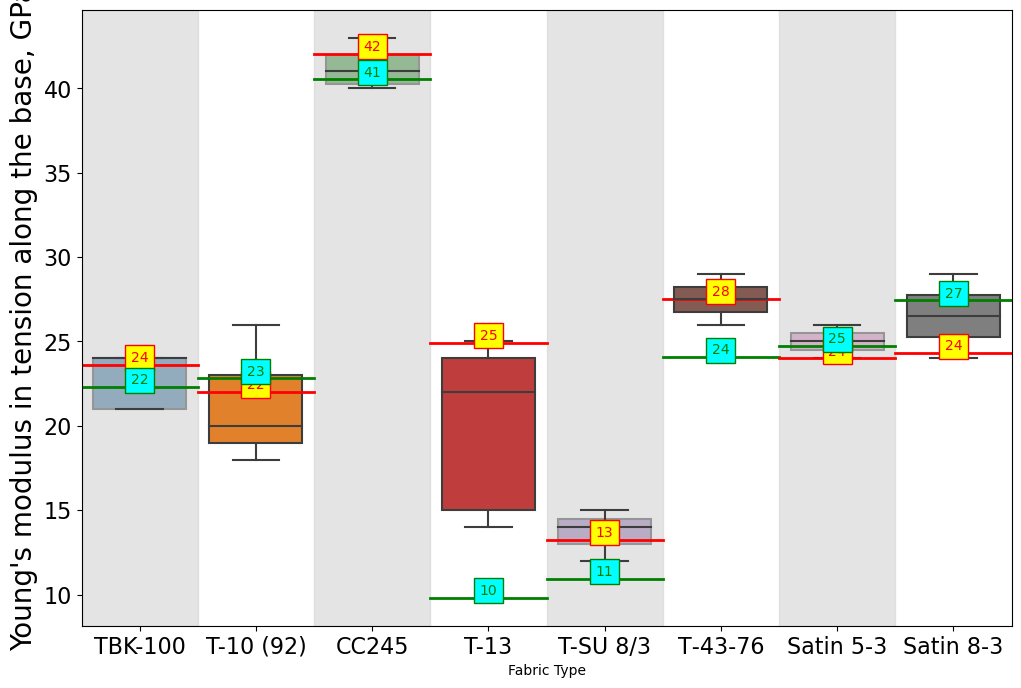

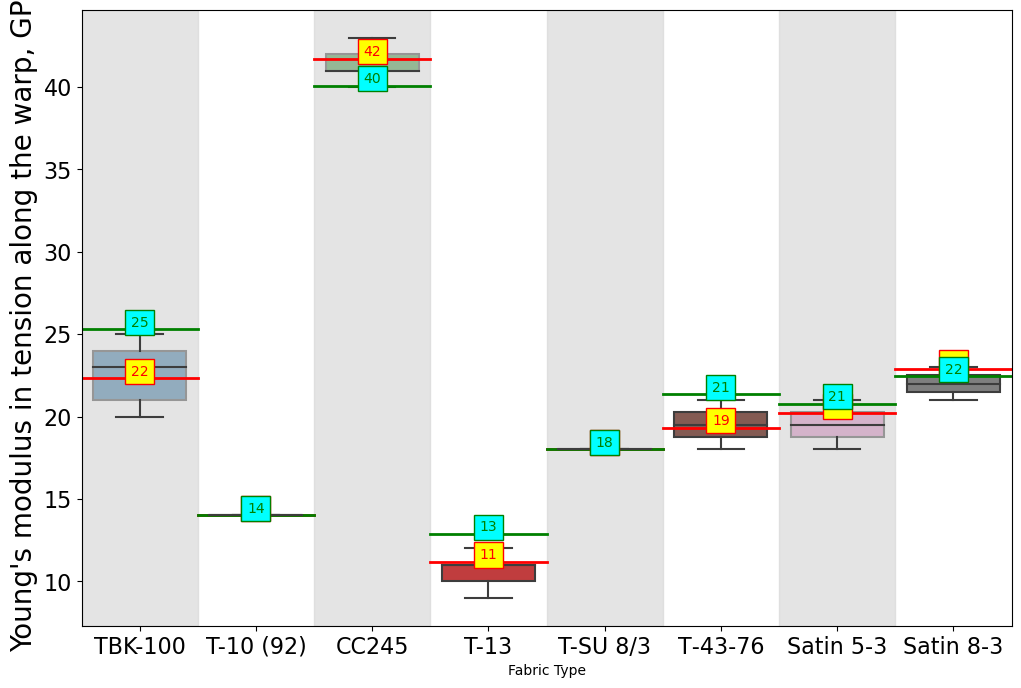

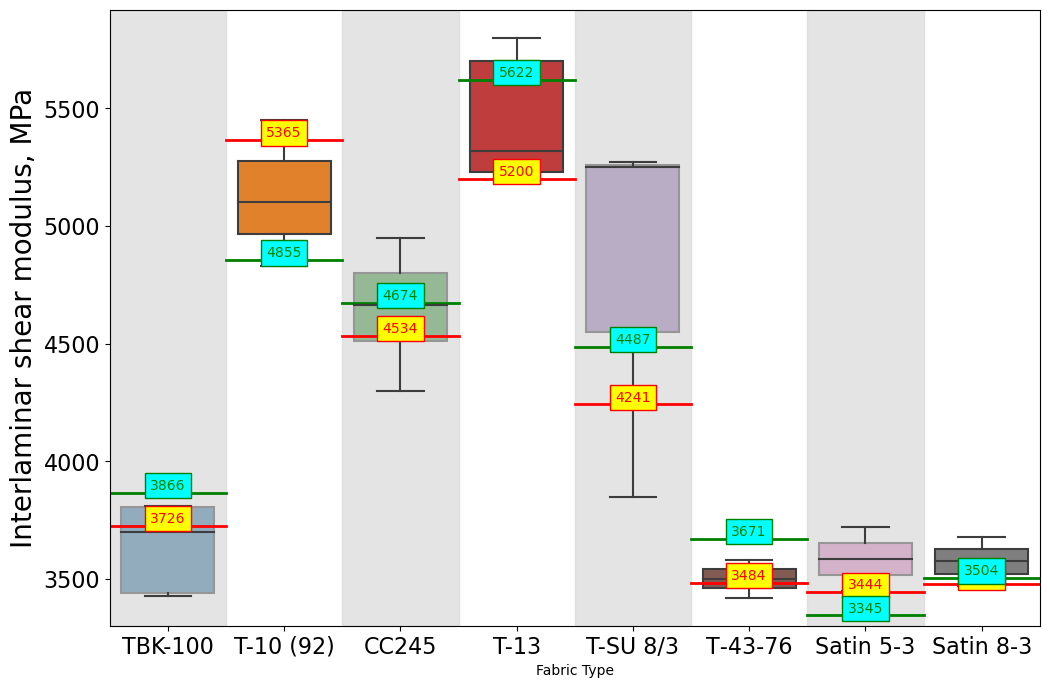

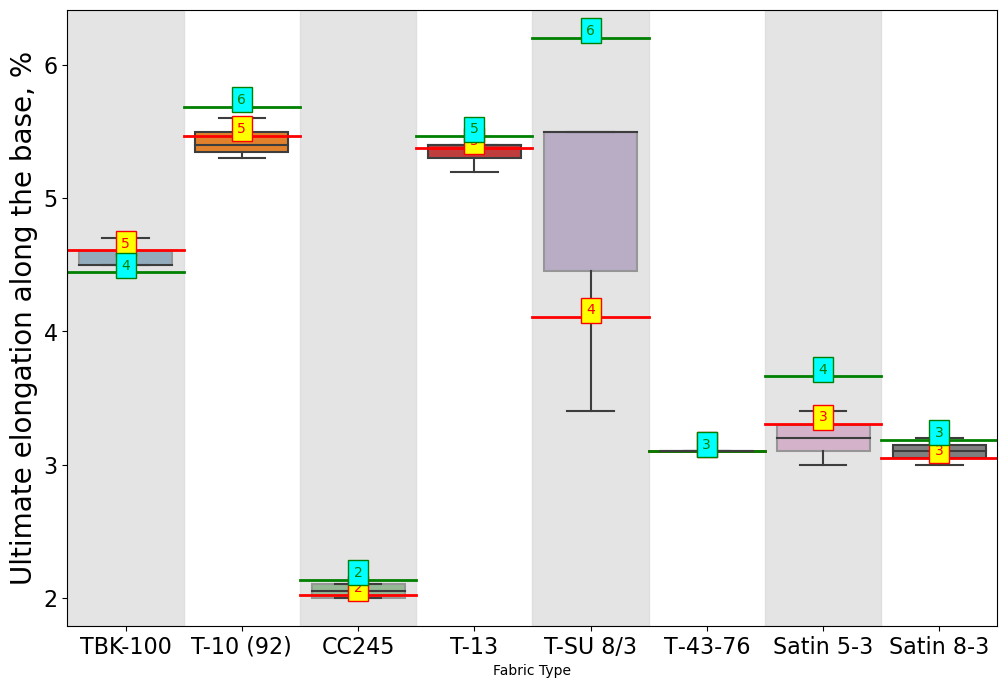

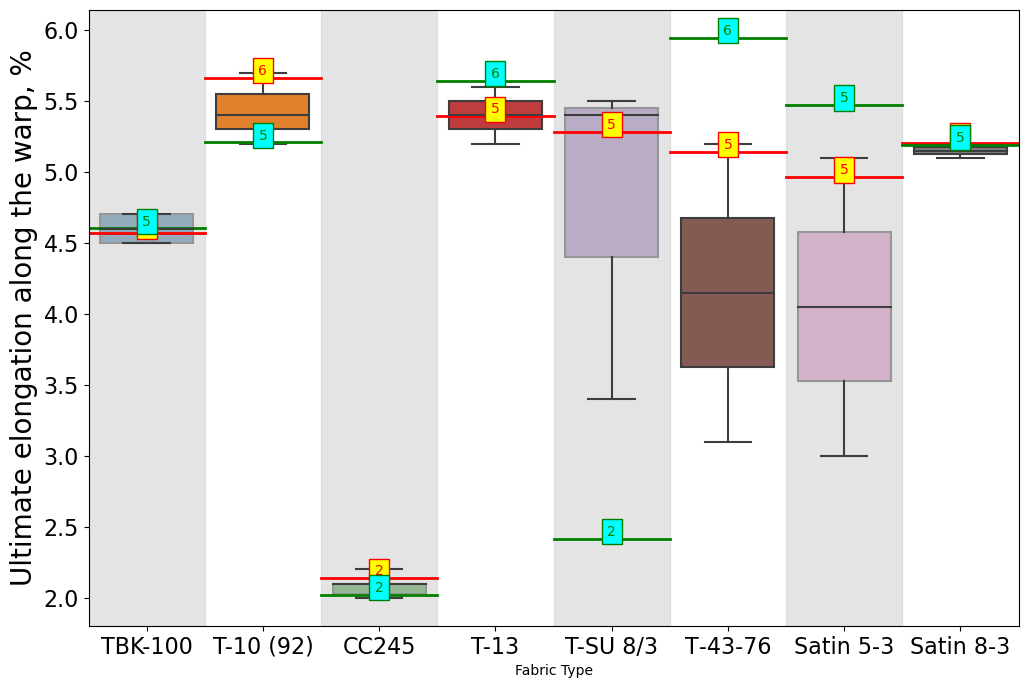

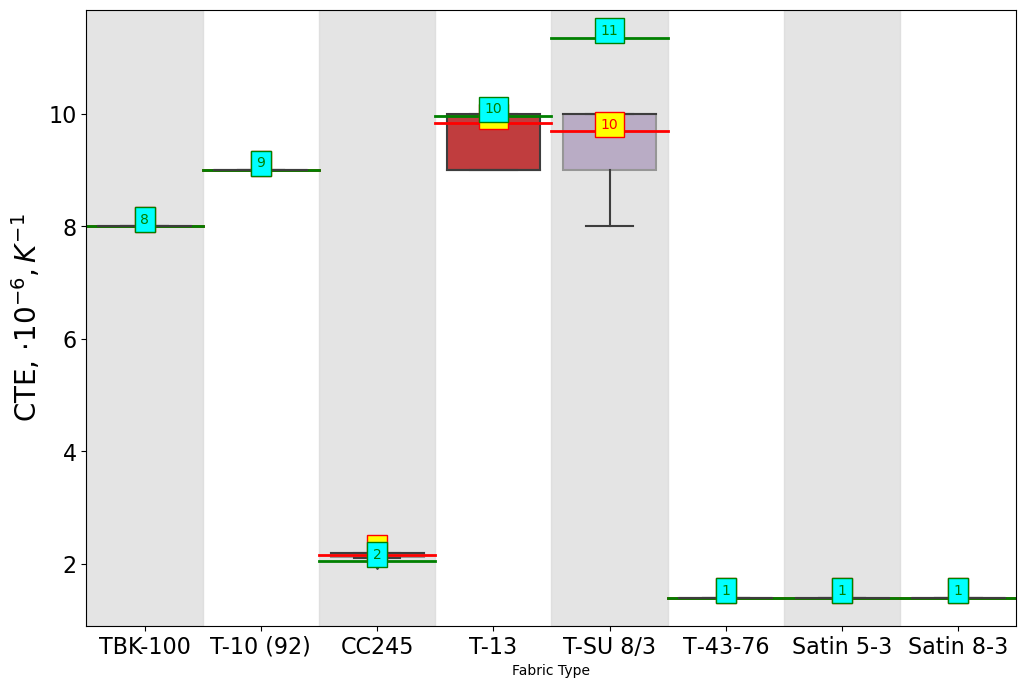

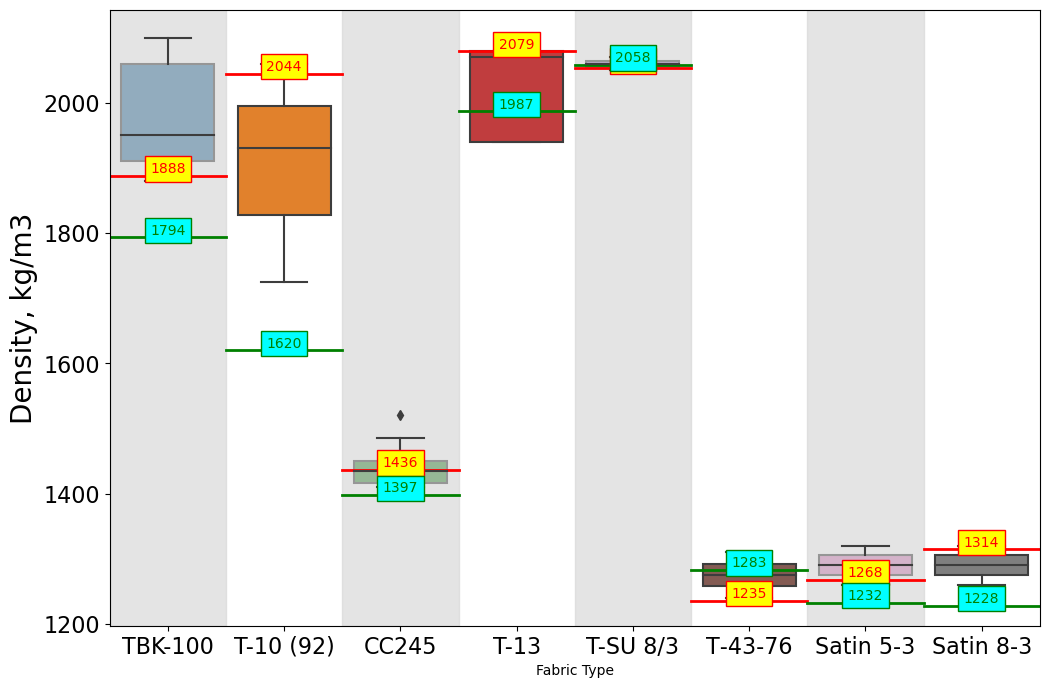

In [122]:
for cc, col in enumerate(cols_without_nans): 
    plt.figure(figsize=(12, 8))

    # Create a dictionary to store mean values for each fabric type
    mean_values = {}

    # Calculate mean values for each fabric type
    for tkan in data['ТКАНЬ: Название'].unique():
        fabric_data = data[data['ТКАНЬ: Название'] == tkan]
        mean_values[tkan] = fabric_data[col].mean()

    # Create a boxplot for each fabric type
    ax = sns.boxplot(data=data[data['ТКАНЬ: Название'].isin(fabric_types_filtered)], x='ТКАНЬ: Название', y=col,
                     whis=1.5, showfliers=True)

    # Set custom labels for the x-axis ticks
    ax.set_xticklabels(mean_values.keys(), rotation=90)

    # Set custom labels for the x-axis ticks
    ax.set_xticklabels(labels, rotation=90)

    # Highlight alternate categories with transparent zebra-like background
    for i, tkan in enumerate(mean_values.keys()):
        if i % 2 == 0:
            ax.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.6)

    # Add mean value as a bold red strip within each whisker
    for i, tkan in enumerate(mean_values.keys()):
        fabric_data = data[data['ТКАНЬ: Название'] == tkan]
        mean_value = fabric_data[col].mean()
        std_value = fabric_data[col].std()
        mean_value_1 = mean_value + 1 * np.random.uniform(-1, 1)*std_value
        #random_offset = 0.1 * std_value  # Фиксированное смещение, определяющее диапазон случайных изменений
        #mean_value = mean_value + np.random.uniform(-random_offset, random_offset)
        ax.axhline(y=mean_value_1, color='red', linestyle='-', linewidth=2, xmin=i/len(mean_values), xmax=(i+1)/len(mean_values))
        # Add mean value to the plot as text
        ax.text(i, mean_value_1, f'{mean_value_1:.0f}', color='red', ha='center', va='bottom', bbox=dict(facecolor='yellow', edgecolor='red'))
        
        mean_value_2 = mean_value + 2 *np.random.uniform(-1, 1)*std_value
        
        ax.axhline(y=mean_value_2, color='green', linestyle='-', linewidth=2, xmin=i/len(mean_values), xmax=(i+1)/len(mean_values))
        # Add mean value to the plot as text
        ax.text(i, mean_value_2, f'{mean_value_2:.0f}', color='green', ha='center', va='bottom', bbox=dict(facecolor='cyan', edgecolor='green'))
        
        
        
    #plt.title('Whisker Plots for Прочность на растяжение по основе, МПа by Fabric Type')
    plt.xlabel('Fabric Type')
    # Set font size for tick labels
    plt.yticks(fontsize=16)

    plt.ylabel(f'{labels_1[cc]}', fontsize=20)
    plt.xticks(rotation=0, fontsize=16)
    plt.savefig(f'whiskers_{cc}_.pdf')
    plt.show()


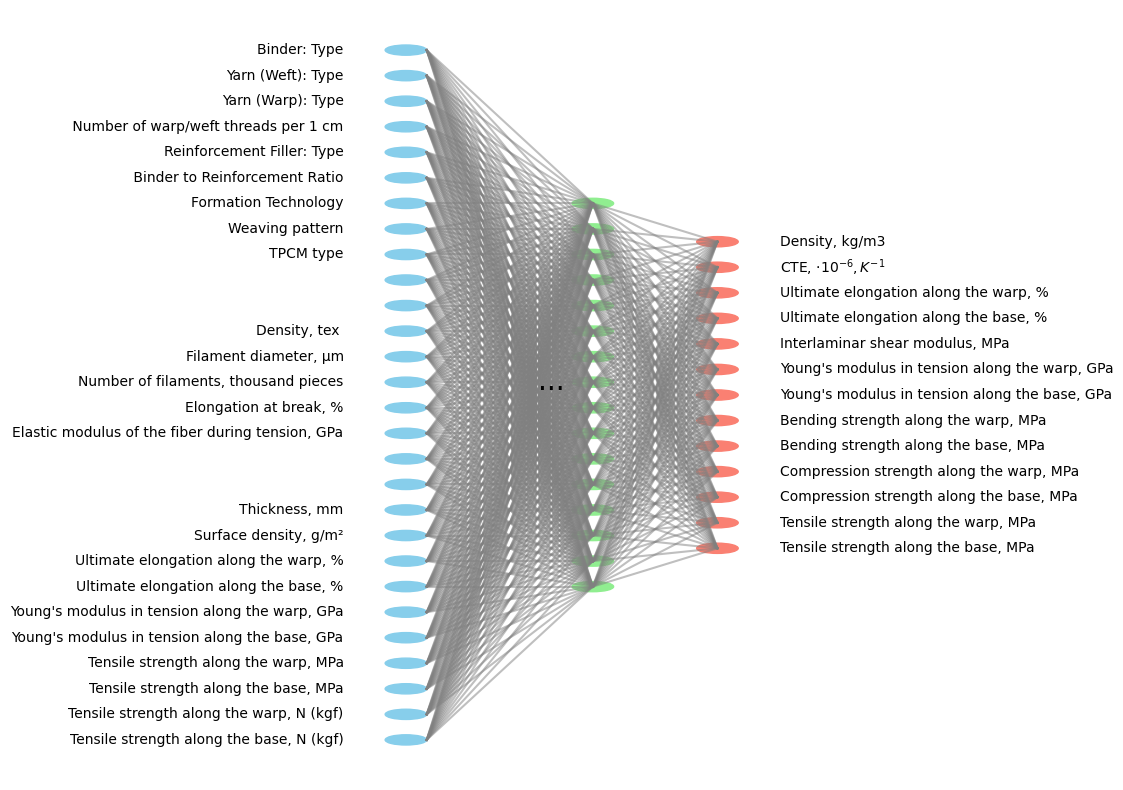

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Define node positions
input_nodes = [    'Tensile strength along the base, N (kgf)',
    'Tensile strength along the warp, N (kgf)',
    'Tensile strength along the base, MPa',
    'Tensile strength along the warp, MPa',
    "Young's modulus in tension along the base, GPa",
    "Young's modulus in tension along the warp, GPa",
    'Ultimate elongation along the base, %',
    'Ultimate elongation along the warp, %',
    'Surface density, g/m²',
    'Thickness, mm',
               '',
               '',
'Elastic modulus of the fiber during tension, GPa',
'Elongation at break, %',
'Number of filaments, thousand pieces',
'Filament diameter, μm',
'Density, tex ',
               '',
               '',
                   'TPCM type',
    'Weaving pattern',
    'Formation Technology',
    ' Binder to Reinforcement Ratio',
    'Reinforcement Filler: Type',
    ' Number of warp/weft threads per 1 cm',
    'Yarn (Warp): Type',
    'Yarn (Weft): Type',
    'Binder: Type',             
              ]

output_nodes = [    'Tensile strength along the base, MPa',
    'Tensile strength along the warp, MPa',
    'Compression strength along the base, MPa',
    'Compression strength along the warp, MPa',
    'Bending strength along the base, MPa',
    'Bending strength along the warp, MPa',
    "Young's modulus in tension along the base, GPa",
    "Young's modulus in tension along the warp, GPa",
    'Interlaminar shear modulus, MPa',
    'Ultimate elongation along the base, %',
    'Ultimate elongation along the warp, %',
    'CTE, $\cdot10^{-6}, K^{-1}$',
    'Density, kg/m3']
hidden_layer_nodes = [f'H{i+1}' for i in range(16)]

# Plot input nodes
for i, node in enumerate(input_nodes):
    ax.add_patch(patches.Circle((0, i - len(input_nodes) / 2), radius=0.2, color='skyblue'))
    ax.text(-0.6, i - len(input_nodes) / 2, node, fontsize=10, va='center', ha='right')

# Plot additional hidden layer nodes
ax.text(1.4, 0, '...', fontsize=20, va='center', ha='center')
for i in range(16):
    ax.add_patch(patches.Circle((1.8, i - len(hidden_layer_nodes) / 2), radius=0.2, color='lightgreen'))

# Plot output nodes
for i, node in enumerate(output_nodes):
    ax.add_patch(patches.Circle((3, i - len(output_nodes) / 2), radius=0.2, color='salmon'))
    ax.text(3.6, i - len(output_nodes) / 2, node, fontsize=10, va='center', ha='left')

# Plot connections between nodes
for i, input_node in enumerate(input_nodes):
    for j, hidden_node in enumerate(hidden_layer_nodes):
        ax.plot([0.2, 1.8], [i - len(input_nodes) / 2, j - len(hidden_layer_nodes) / 2], color='gray', alpha=0.5)

# Plot connections from the hidden layer to output nodes
for i, hidden_node in enumerate(hidden_layer_nodes):
    for j, output_node in enumerate(output_nodes):
        ax.plot([1.8, 3], [i - len(hidden_layer_nodes) / 2, j - len(output_nodes) / 2], color='gray', alpha=0.5)

# Remove axes
ax.axis('off')

# Show plot
plt.tight_layout()
plt.savefig('NN.pdf')
plt.show()
